# Natural language processing - getting the sentiment score for positive, negative and unceratinty. Using Loughran and McDonalds' method

We are now going to move on to extracting the sentiment positive, negative and uncertainty scores for the transcripts.
We are going to use the dictionary developed by Loughran and McDonald, compared to other methods, this is developed within our field of academia.
A lot of other methods use dictionaries created from other data sources than financial texts, like social media. This will not be as suitable for our usecase.

This is because words otherwise seen as negative are not always in finance.
"We find that almost three-fourths of negative word counts in 10-K filings based on the Harvard dictionary are typically not negative in a financial context. Common words like depreciation, liability, foreign, and board are not tona when occurring in a 10-K." - Loughran, Tim, and Bill McDonald. "When is a liability not a liability? Textual analysis, dictionaries, and 10‐Ks.", The Journal of Finance 66, no. 1 (2011): 35-65.

In [31]:
# If you run into a spacy problem, run this command again by removing the # before the next row
#!python -m spacy download en_core_web_md 

In [32]:
# Spacy is a NLP library that can be used for a lot of things, 
# we are going to be using it to remove stopwords, punctuations and so on. 
import spacy
nlp=spacy.load('en_core_web_md')

## Lets import the transcripts again, and prepare one for analysis

In [33]:
import pickle
transcripts = pickle.load( open( str("transcripts/ABBV.p"), "rb" ) )

In [34]:
len(transcripts)

48

In [35]:
transcripts[1].keys()

dict_keys(['audio', 'id', 'participant', 'quarter', 'symbol', 'time', 'title', 'transcript', 'year'])

In [36]:
for t in transcripts:
    print('This transcript is from: ', t['time'])

This transcript is from:  2021-02-04 00:59:09
This transcript is from:  2020-10-30 20:18:17
This transcript is from:  2020-07-31 19:59:11
This transcript is from:  2020-05-01 19:27:53
This transcript is from:  2020-02-07 18:36:46
This transcript is from:  2020-01-15 19:22:17
This transcript is from:  2019-11-01 19:45:10
This transcript is from:  2019-09-10 20:22:25
This transcript is from:  2019-07-26 17:56:58
This transcript is from:  2019-06-25 19:29:10
This transcript is from:  2019-06-12 21:21:57
This transcript is from:  2019-04-25 22:11:10
This transcript is from:  2019-03-13 19:19:09
This transcript is from:  2019-03-12 16:14:08
This transcript is from:  2019-01-25 18:52:18
This transcript is from:  2019-01-09 21:27:30
This transcript is from:  2018-11-27 20:25:24
This transcript is from:  2018-11-02 16:23:27
This transcript is from:  2018-09-12 19:19:10
This transcript is from:  2018-07-27 21:46:59
This transcript is from:  2018-04-26 18:04:21
This transcript is from:  2018-01-

In [37]:
text_transcipt = ''

for speech in transcripts[0]['transcript']:
    #print(speech['speech'][0])
    #print()
    
    text_transcipt = text_transcipt + ' ' + speech['speech'][0]
text_transcipt

" Good morning and thank you for standing by. Welcome to the AbbVie Fourth Quarter 2020 Earnings conference call. All participants will be able to listen only until the question-and-answer portion of this call. [Operator Instructions] I would now like to introduce Ms. Liz Shea, Vice President of Investor Relations. Good morning and thanks for joining us. Also on the call with me today are Rick Gonzalez, Chairman of the Board and Chief Executive Officer; Michael Severino, Vice Chairman and President; and Rob Michael, Executive Vice President and Chief Financial Officer. Joining us for the Q&A portion of the call is Jeff Stewart, Executive Vice President, Commercial Operations. Before we get started, I remind you that some statements we make today may be considered forward-looking statements for purposes of the Private Securities Litigation Reform Act of 1995. AbbVie cautions that these forward-looking statements are subject to risks and uncertainties, including the impact of the COVID-1

In [38]:
text_transcipt = ''

# Here we loop through all statements, 
# here one could add a check if the person speaking is e.g. an analyst, 
# since the speach  object has a "name" attached to it as well. 
for speech in transcripts[1]['transcript']:
    # here we create a new string from the old string + the last statement (speach)
    # We add a space in between to prevent it from adding the first and last word together
    text_transcipt = text_transcipt + ' ' + speech['speech'][0] 

In [39]:
text_transcipt

' Good morning and thank you for standing by. Welcome to the AbbVie Third Quarter 2020 Earnings Conference Call. All participants will be able to listen-only until the question-and-answer portion [Operator Instructions] And I would now like to introduce Ms. Liz Shea, Vice President of Investor Relations. Good morning and thanks for joining us. Also on the call with me today are Rick Gonzalez, Chairman of the Board and Chief Executive Officer; Michael Severino, Vice Chairman and President; Rob Michael, Executive Vice President and Chief Financial Officer; and joining us for the Q&A portion of the call is Laura Schumacher, Vice Chairman, External Affairs, Chief Legal Officer and Corporate Secretary. Before we get started, I remind you that some statements we make today may be considered forward-looking statements for purposes of the Private Securities Litigation Reform Act of 1995. AbbVie cautions that these forward-looking statements are subject to risks and uncertainties, including the

# How we prepare our text for analysis:¶

In [40]:
# Remove stop words, spaces, punctuation
# Lemmatize
# Convert to lower case
words=[
#     word
#     type(word)
#     word.lower_
#     type(word.lower_)
#     word.lemma_
#     type(word.lemma_)
#     (word.lower_, word.lemma_.lower())
    word.lemma_.lower()                 # Lemmatize and lower case
    for word in nlp(text_transcipt)   # Tokenize
    if not (
        word.is_space                   # Remove spaces
        or word.is_stop                 # Remove stop words
        or word.is_punct                # Remove punctuation
    )
]

# Lemmatize
print('Here are the first 100 words that are kept.')
print(words[:100])

Here are the first 100 words that are kept.
['good', 'morning', 'thank', 'stand', 'welcome', 'abbvie', 'quarter', '2020', 'earnings', 'conference', 'participant', 'able', 'listen', 'question', 'answer', 'portion', 'operator', 'instructions', 'like', 'introduce', 'ms.', 'liz', 'shea', 'vice', 'president', 'investor', 'relations', 'good', 'morning', 'thank', 'join', 'today', 'rick', 'gonzalez', 'chairman', 'board', 'chief', 'executive', 'officer', 'michael', 'severino', 'vice', 'chairman', 'president', 'rob', 'michael', 'executive', 'vice', 'president', 'chief', 'financial', 'officer', 'join', 'q&a', 'portion', 'laura', 'schumacher', 'vice', 'chairman', 'external', 'affairs', 'chief', 'legal', 'officer', 'corporate', 'secretary', 'start', 'remind', 'statement', 'today', 'consider', 'forward', 'look', 'statement', 'purpose', 'private', 'securities', 'litigation', 'reform', 'act', '1995', 'abbvie', 'caution', 'forward', 'look', 'statement', 'subject', 'risk', 'uncertainty', 'include', 'imp

### Explanation:
* Tokenization and Stop Word Removal: The code starts by tokenizing the input text using nlp(text_transcript), which breaks the text into individual tokens (words and punctuation marks). 

These tokens are then filtered to exclude unwanted elements:
* <u>word.is_space</u>: This checks whether the token is a space or a newline, and if it is, it is excluded from further processing.
* <u>word.is_stop</u>: This condition filters out common stop words such as "the", "and", "is", which are generally not useful in most NLP tasks since they don’t add significant meaning.
* word.is_punct: This removes punctuation marks, ensuring only meaningful words are kept for further analysis.
* <u>Lemmatization and Lowercasing</u>: After filtering, the remaining tokens are lemmatized using word.lemma_. Lemmatization reduces each word to its base or dictionary form (e.g., "running" becomes "run"). This helps in treating different inflections of the same word as a single entity. *
* After lemmatization, the words are also converted to lowercase with word.lemma_.lower(), ensuring consistency in analysis and avoiding case sensitivity issues.

List Comprehension: The entire process of filtering and transforming the tokens is performed in a Python list comprehension. For each word in the tokenized text, the code checks if it is a space, stop word, or punctuation, and if it passes these conditions, it adds the lowercased lemma of the word to the list. The result is a clean list of meaningful, lowercase, lemmatized words.

# Lets create a function that does this, so we do not have to write all this code more times.

In [41]:
# Putting all in a function so that we can use it later 
def process_text(text):
    # Tokenize
    # Remove stop words, spaces, punctuation
    # Lemmatize
    # Convert to lower case
    words=[
        word.lemma_.lower()                 # Lemmatize and lower case
        for word in nlp(text)          # Tokenize
        if not (
            word.is_space                   # Remove spaces
            or word.is_stop                 # Remove stop words
            or word.is_punct                # Remove punctuation
        )
    ]
    return words

### What does the function do? 
Let's test it with a very simple string to check

In [42]:
process_text('Hi and welcome to the earnings conference call of Apple')

['hi', 'welcome', 'earning', 'conference', 'apple']

If we want to do anything with what the function returns, we have to save it in a variable:

In [43]:
apple_word_list = process_text('Hi and welcome to the earnings conference call of Apple')

In [44]:
apple_word_list

['hi', 'welcome', 'earning', 'conference', 'apple']

# We need to save the amount of words for later. 
So that we can turn X positive words into a ratio of total words

In [45]:
# We the save the amount of words for later. This will show us how many % of the words are e.g. positive. 
number_of_words=len(words)
number_of_words

5903

# Getting the Loughran & McDonald word list 

# **Preparing Word Lists and Processing Text for NLP Tasks**

In this section, we will simplify the steps to load, process, and convert the word lists into formats suitable for Natural Language Processing (NLP) tasks. We will use three word lists:
- **LM_positive**: For positive words
- **LM_negative**: For negative words
- **LM_uncertainty**: For uncertainty-related words

Our goal is to prepare these word lists, process them, and ensure they are in the correct format for further analysis.

---

## **Loading Word Lists into DataFrames**

In [46]:
import pandas as pd
LM_negative=pd.read_excel('LoughranMcDonald_SentimentWordLists_2018.xlsx', sheet_name='Negative', header=None)
LM_positive=pd.read_excel('LoughranMcDonald_SentimentWordLists_2018.xlsx', sheet_name='Positive', header=None)
LM_uncertainty=pd.read_excel('LoughranMcDonald_SentimentWordLists_2018.xlsx', sheet_name='Uncertainty', header=None)

# **Inspecting Word Lists**
After loading the data, we will inspect the first few rows to verify that the lists have been loaded correctly. It’s important to check for any inconsistencies in the data such as empty rows or duplicates, which we might need to clean later.
pect what is in these lists

In [47]:
# Display the first few rows of each word list to ensure correct loading
print(LM_positive.head())
print(LM_negative.head())
print(LM_uncertainty.head())

            0
0        ABLE
1   ABUNDANCE
2    ABUNDANT
3   ACCLAIMED
4  ACCOMPLISH
              0
0       ABANDON
1     ABANDONED
2    ABANDONING
3   ABANDONMENT
4  ABANDONMENTS
             0
0     ABEYANCE
1    ABEYANCES
2       ALMOST
3   ALTERATION
4  ALTERATIONS


# **Converting DataFrames to Lists**
The next step is to convert these DataFrame columns into Python lists. This allows us to process the words more easily using Python functions. The `.squeeze()` method is used to flatten the DataFrame into a Series, and `.tolist()` converts it into a list.

Converting these DataFrames ensures that we can process and manipulate the data for further analysis.

In [48]:
# Convert DataFrame columns into lists
LM_positive_list = LM_positive.squeeze().tolist()  # Squeeze is used to flatten the DataFrame column
LM_negative_list = LM_negative.squeeze().tolist()
LM_uncertainty_list = LM_uncertainty.squeeze().tolist()

# Check lengths of the lists to ensure they are loaded correctly
len(LM_positive_list), len(LM_negative_list), len(LM_uncertainty_list)

(354, 2355, 297)

# **Processing the Word Lists**
We will now clean and process the word lists using a custom function `process_text()`. The function will:
- Remove punctuation.
- Convert all words to lowercase.
- Tokenize the words (split them into individual tokens).

This step is essential for normalizing the text so that it can be used for natural language processing (NLP) tasks.


In [49]:
LM_positive_set = set(process_text(' '.join(LM_positive_list)))
LM_negative_set = set(process_text(' '.join(LM_negative_list)))
LM_uncertainty_set = set(process_text(' '.join(LM_uncertainty_list)))
len(LM_positive_set), len(LM_negative_set), len(LM_uncertainty_set)

(298, 1816, 238)

Here you see a set(). This is another type of list used to make the process of extracting what positive, negative and uncertain words are in the the text. It also remove duplicates, which we have and need to remove.

# **Using `Counter` to Analyze Word Frequency**
Once the word lists are processed, one common task is to analyze the frequency of words. The `Counter` class from Python’s `collections` module is a useful tool for this. It counts the occurrence of each word in a list, providing a simple way to measure word frequency.

### **Why Use `Counter`?**
- **Frequency Analysis**: It helps you quickly understand how often certain words appear, which can be useful for identifying common themes, sentiments, or even noise in the data.
- **Efficient Counting**: The `Counter` is optimized for counting elements and returns a dictionary-like object where the keys are the items (words), and the values are their counts.

We will now use `Counter` to calculate the frequency of words in each of our processed word lists.

In [50]:
from collections import Counter

# **Using `Counter` for Word Frequency Analysis**

In this section, we are using the `Counter` class from Python’s `collections` module to count the frequency of words in our processed text.

### **What is `Counter`?**
`Counter` is a specialized dictionary subclass designed specifically for counting hashable objects. It takes a list or any iterable as input and returns a dictionary-like object where:
- **Keys** are the items in the list (in our case, words).
- **Values** are the counts (i.e., how many times each word appears).
each word used in out text?


In [51]:
counts=Counter(words)
counts

Counter({'$': 88,
         'think': 83,
         'market': 80,
         'look': 65,
         'question': 61,
         'billion': 58,
         'patient': 57,
         'thank': 55,
         'growth': 50,
         'year': 44,
         'share': 38,
         'indication': 38,
         'quarter': 37,
         'like': 32,
         'skyrizi': 32,
         'expect': 32,
         'go': 32,
         'sale': 31,
         'rinvoq': 30,
         'asset': 30,
         'revenue': 29,
         'strong': 29,
         'new': 29,
         'continue': 29,
         'term': 28,
         'study': 27,
         'result': 26,
         'guidance': 26,
         'include': 25,
         'long': 25,
         'significant': 25,
         'migraine': 25,
         'botox': 25,
         'abbvie': 24,
         'business': 24,
         'product': 24,
         'remain': 24,
         'high': 24,
         'phase': 24,
         'good': 23,
         'portfolio': 23,
         'potential': 23,
         'number': 23,
         'mill

# **Scoring Words Using `keys()` and Predefined Sentiment Sets**

In our text analysis, we are using two critical components:
1. **The set of unique words from the `Counter` object**: These represent the words that appeared in the text we're analyzing.
2. **The predefined word lists** (like `LM_positive_set`, `LM_negative_set`, and `LM_uncertainty_set`): These are sets of sentiment-bearing words (from external sources like the Loughran-McDonald dictionary) that help us classify the words from the text into sentiment categories (positive, negative, and uncertainty).

By using both of these components together, we can:
- Identify which words from the text match the words in our predefined sentiment word lists.
- Count how many times those words appear in the text to calculate sentiment scores.


In [52]:
# Initialize the scores
positive_score = 0
negative_score = 0
uncertainty_score = 0

# Loop through all unique words in the Counter
for word in counts.keys():  # keys() returns all unique words
    if word in LM_positive_set:
        positive_score += counts[word]  # Add the count of the word to the positive score
    elif word in LM_negative_set:
        negative_score += counts[word]  # Add the count of the word to the negative score
    elif word in LM_uncertainty_set:
        uncertainty_score += counts[word]  # Add the count of the word to the uncertainty score

# Display the scores
print(f"Positive Score: {positive_score}")
print(f"Negative Score: {negative_score}")
print(f"Uncertainty Score: {uncertainty_score}")


Positive Score: 228
Negative Score: 119
Uncertainty Score: 92


# **Making Sentiment Scores Relative to Text Length**

### **Why Make Scores Relative to Text Length?**

When working with texts of different lengths, comparing raw sentiment scores (i.e., the total counts of positive, negative, and uncertainty words) across these texts can be misleading. For example:
- A text with 10,000 words will likely have more positive or negative words simply because it contains more content.
- A text with only 100 words will have fewer words overall, which could result in lower raw scores, even if it is more positive or negative in tone.

To make these scores **comparable across texts** of varying lengths, we need to **normalize** the scores by dividing them by the total number of words in the text. This way, we express the scores as a proportion of the total word count, giving us a better understanding of the sentiment **relative** to the length of the text.

---

### **How Does This Work?**

We calculate the **relative score** by dividing the total score (e.g., positive, negative, uncertainty) by the total number of words in the text. Then, we round these relative scores to make them easier to interpret and display.

Here’s how it works step by step:
1. **Calculate the total number of words** in the text (`number_of_words`). This can be obtained by summing up the word counts from the `Counter`.
2. **Divide each sentiment score** by the total number of words to get a relative measure of how frequently that sentiment occurs in the text.
3. **Round the result** to a set number of decimal places (4 in this example) to avoid overly precise numbers, which might not add much value in analysis.

This method ensures that the sentiment scores are **comparable across texts**, regardless of whether the text contains 100 words or 10,000 words.

---

### **Example of Relative Scoring Calculation**

In this example, we:
- **Round** the sentiment scores to 4 decimal places to keep them readable.
- **Normalize** the scores by dividing them by the total number of words in the text.


In [53]:
# Lets round these number since they will have very many decimals otherwise
# Again, there is nothing forcing you to use the score divided by the total number of words. 
# It's one way, if you think you have a better approach, test it! 
pos_score = round((positive_score / number_of_words), 4)
neg_score = round((negative_score / number_of_words), 4)
unc_score = round((uncertainty_score / number_of_words), 4)
pos_score, neg_score, unc_score

(0.0386, 0.0202, 0.0156)

# **Applying Sentiment Analysis to Multiple Transcripts**

Now that we have successfully extracted sentiment scores (positive, negative, and uncertainty) for one transcript, the next step is to scale this process up so we can calculate these scores for multiple transcripts efficiently.

### **Creating a Function to Automate the Process**

To process a large number of transcripts, we will encapsulate the steps we followed into a function. This function will:
1. **Take the transcript text as input**.
2. **Process the text** to extract positive, negative, and uncertainty scores.
3. **Return the sentiment scores** relative to the length of the transcript.

By creating a function, we can avoid manually repeating the same steps for each transcript, making the process efficient and reusable.

### **Why Use a Function?**
- **Automation**: Once we define the function, we can loop over a collection of transcripts, applying the same sentiment analysis steps to each transcript.
- **Consistency**: By applying the same function to each transcript, we ensure that the scoring process is consistent across all texts.
- **Scalability**: The function allows us to handle large datasets of transcripts without manually processing each one.

---

### **Looping Over All Transcripts**

Once the function is defined, we will use a loop to iterate over all the transcripts. For each transcript:
1. **Extract the date** (if available), since we will eventually want to associate each transcript with a specific event or date.
2. **Apply the sentiment analysis function** to calculate the sentiment scores (positive, negative, and uncertainty).
3. **Store the results** in a structured format (like a dictionary or a list), so we can later convert them into a DataFrame for further analysis.

### **Matching Transcripts with Dates**

Most likely, each transcript corresponds to a specific event, conference, or communication. For example, if we are analyzing earnings conference calls (ECCs), each transcript might be associated with the date of the call.

We can match each transcript with its respective date, and store the sentiment scores alongside the date. This will allow us to later analyze how sentiment changes over time, track trends, or correlate sentiment with external factors (such as stock prices, economic events, etc.).

### **Organizing the Results into a DataFrame**

After looping through all transcripts and calculating their scores, we will:
1. **Create a DataFrame**: This will store the sentiment scores and dates for all the transcripts.
2. **Organize the Data**: Each row will represent one transcript, and the columns will include:
   - The **date** of the transcript.
   - The **positive score**, **negative score**, and **uncertainty score** for the transcript.
   
The resulting DataFrame will provide an organized view of the sentiment analysis results, making it easy to visualize or further analyze the sentiment trends over time.

# Lets get the dates for all ECCs

In [54]:
# We're going to need to know what score is from what time, we can do the following to get this information
transcripts[0]['time']

'2021-02-04 00:59:09'


Now we can create a loop that creates to lists, one with the dates and one with the complete texts. Here is where you could get creative later when changing if you look at only CEO or only analysts and so on.

In [55]:
transcripts_texts = []

# We also create an array of all dates that we can add in the end to know when each earnings call was held.
times = []

for t in transcripts:
    text = ''
    for speech in t['transcript']:
        text = str(text + ' '+ speech['speech'][0])

    transcripts_texts.append(text)
    
    times.append(t['time'])
    
len(transcripts_texts), len(times)

(48, 48)

Now that we see that they are the same length, we know that the score at index 10 will be for the time at index 10.

# NOTE: If your kernel is crashing, do not forget to kill other kernals that is taking up memory and compute power! 

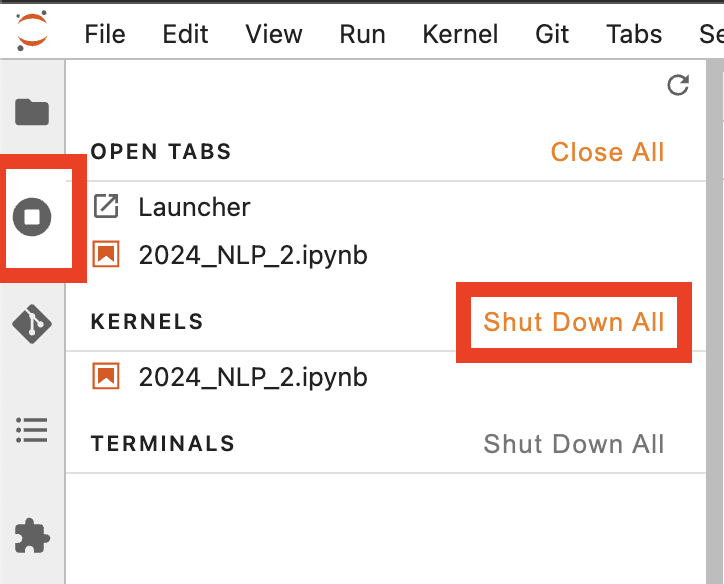

### After this, sometimes you have to select a new kernel, if it says "No Kernel" in the top right. See image
1. Go to the top right and click "No Kernel" 
2. Select the Python 3 kernel and click select

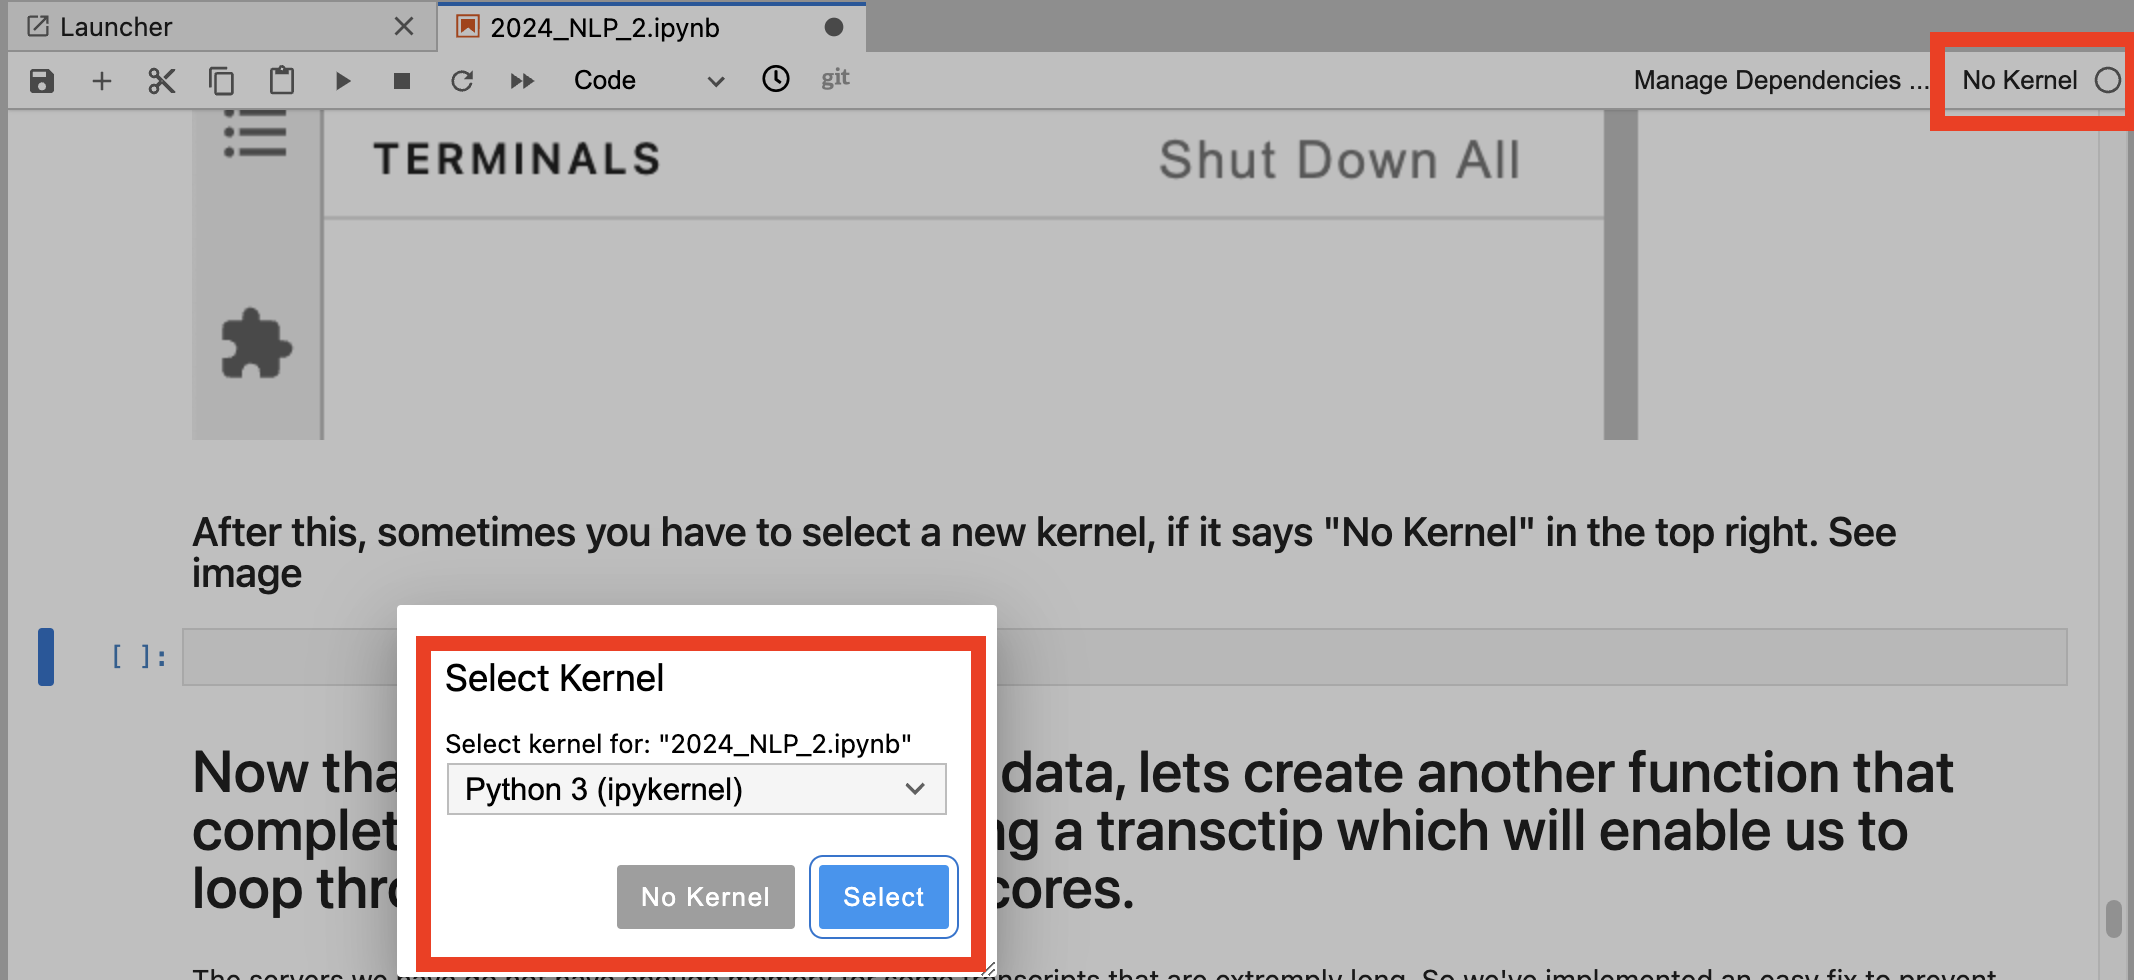

# Now that we have prepared the data, lets create another function that completes the process of scoring a transctip which will enable us to loop through them all and get scores.

The servers we have do not have enough memory for some transcripts that are extremply long. So we've implemented an easy fix to prevent the notebooks from crashing, if the transcripts are more than X words, then only save the X first words. We've used 80.000 here which has worked well before, but you are free to test if you can increase it. 

In [56]:
def score_transcript(text):
    # Fix to prevent notebook from crashing
    if len(text) > 20_000:
        text = text[:20_000] # Only save the X first words. 
    
    
    # Running the function we created earlier that remove stopwords, spaces and so on... 
    words = process_text(text)

        
    # This is the same as above as well. 
    # We the save the amount of words for later. This will show us how many % of the words are e.g. positive. 
    number_of_words=len(words)
    
    counts=Counter(words)

    keys=set(counts.keys())

    # Calculate the positive score by finding the intersection between the keys in 'counts'
    # and the 'LM_positive_set', summing the counts for those words, and dividing by the total number of words.
    # 'keys & LM_positive_set' gives the set of words that are both in 'counts' and in the 'LM_positive_set'.
    pos = round(
        (sum([counts[k] for k in (keys & LM_positive_set)]) / number_of_words),
        4
    )

    # Similarly, calculate the negative score by finding the intersection between the keys and 'LM_negative_set'.
    neg = round(
        (sum([counts[k] for k in (keys & LM_negative_set)]) / number_of_words),
        4
    )

    # Finally, calculate the uncertainty score using the same method.
    unc = round(
        (sum([counts[k] for k in (keys & LM_uncertainty_set)]) / number_of_words),
        4
    )
    
    # This could also be done with the simpler loop that checks what list each word is in, this is a slightly optimized version to reduce the time we have to spend on each calculation

    return(pos, neg, unc)

In [57]:
# If you want to run a test and not run through all (which will take time) do this,
# and it will only run on 4 instead of all transctips 
# transcripts_texts = transcripts_texts[:4]

Now we are also printing how much of the compute resources we are using to get an indication if we are using too much, which would indicate that we need to kill other kernals and reduce the maximum text length in the score_transcript function.

In [58]:
import numpy as np
import psutil # Now we monitor how much of the compute we use as well

# Let's create a dataframe to save all scores.
sentiment_scores = pd.DataFrame(columns=['pos', 'neg', 'unc'])

# Loop through all texts 
for texts in transcripts_texts:
    # Calls our scoring function and gets 3 scores back
    scores = score_transcript(texts)
    
    # it is nice to add some prints to know the loop is working and we are progressing
    print(f"scores: {scores} Memory Usage: {psutil.virtual_memory().percent}% and CPU Usage: {psutil.cpu_percent(interval=1)}%")
    
    # This creates a new dataframe with one line of 3 scores 
    # and adds it to the bottom of our dataframe that stores all scores
    sentiment_scores = pd.concat([sentiment_scores, pd.DataFrame([np.array(scores)], columns=['pos', 'neg', 'unc'])]).reset_index(drop=True)

scores: (0.0392, 0.0109, 0.0169) Memory Usage: 78.7% and CPU Usage: 18.3%


/var/folders/9t/x3x7t9jx2sl_j1zfhq6vmmxh0000gn/T/ipykernel_79255/2288903398.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  sentiment_scores = pd.concat([sentiment_scores, pd.DataFrame([np.array(scores)], columns=['pos', 'neg', 'unc'])]).reset_index(drop=True)


scores: (0.0502, 0.0081, 0.0092) Memory Usage: 78.6% and CPU Usage: 19.0%
scores: (0.0507, 0.0139, 0.0145) Memory Usage: 78.7% and CPU Usage: 22.7%
scores: (0.03, 0.049, 0.0249) Memory Usage: 79.7% and CPU Usage: 33.3%
scores: (0.0315, 0.0448, 0.0124) Memory Usage: 79.3% and CPU Usage: 17.1%
scores: (0.0512, 0.0085, 0.0268) Memory Usage: 79.0% and CPU Usage: 19.5%
scores: (0.0328, 0.053, 0.0088) Memory Usage: 78.6% and CPU Usage: 19.1%
scores: (0.0426, 0.0226, 0.0146) Memory Usage: 78.6% and CPU Usage: 19.0%
scores: (0.0302, 0.0497, 0.0098) Memory Usage: 78.7% and CPU Usage: 19.8%
scores: (0.0331, 0.0523, 0.0177) Memory Usage: 78.5% and CPU Usage: 22.3%
scores: (0.0363, 0.0168, 0.0209) Memory Usage: 78.6% and CPU Usage: 18.2%
scores: (0.0459, 0.0147, 0.0159) Memory Usage: 78.5% and CPU Usage: 17.7%
scores: (0.0419, 0.01, 0.0133) Memory Usage: 78.6% and CPU Usage: 17.7%
scores: (0.0476, 0.0133, 0.0231) Memory Usage: 78.6% and CPU Usage: 21.0%
scores: (0.0378, 0.0192, 0.0135) Memory Usag

In [59]:
sentiment_scores

,pos,neg,unc
0,0.0392,0.0109,0.0169
1,0.0502,0.0081,0.0092
2,0.0507,0.0139,0.0145
3,0.0300,0.0490,0.0249
4,0.0315,0.0448,0.0124
5,0.0512,0.0085,0.0268
6,0.0328,0.0530,0.0088
7,0.0426,0.0226,0.0146
8,0.0302,0.0497,0.0098
9,0.0331,0.0523,0.0177


# Lets now add the dates in.

In [60]:
sentiment_scores.index = pd.to_datetime(times)

# Lets also reverse the order so that old is first. Makes it easier to merge. 
# https://stackoverflow.com/a/3940137
sentiment_scores = sentiment_scores[::-1]

sentiment_scores

,pos,neg,unc
2013-03-13 23:56:19,0.0209,0.0285,0.0167
2013-04-26 16:01:16,0.0351,0.0284,0.0190
2013-05-15 03:26:07,0.0374,0.0240,0.0107
2013-06-13 23:59:05,0.0430,0.0175,0.0148
2013-07-26 17:10:06,0.0318,0.0178,0.0135
2013-09-10 22:25:10,0.0535,0.0144,0.0103
2013-10-25 16:30:05,0.0456,0.0231,0.0152
2014-01-31 16:51:14,0.0454,0.0199,0.0150
2014-03-05 18:57:07,0.0340,0.0314,0.0133
2014-04-25 18:44:09,0.0397,0.0209,0.0132


<Axes: >

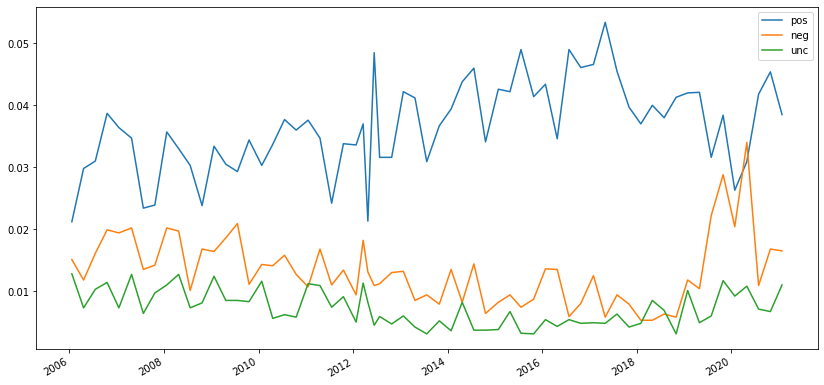

In [31]:
sentiment_scores.plot(figsize=(14,7))

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the correlation matrix
correlation_matrix = sentiment_scores.corr()
correlation_matrix

,pos,neg,unc
pos,1.000000,-0.378070,-0.417022
neg,-0.378070,1.000000,0.609713
unc,-0.417022,0.609713,1.000000


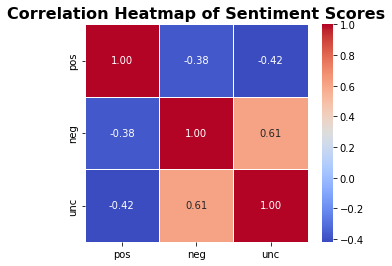

In [33]:
# Set up the matplotlib figure
plt.figure(figsize=(5, 4))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")

# Add a title
plt.title('Correlation Heatmap of Sentiment Scores', fontsize=16, fontweight='bold')

# Show the plot
plt.show()

# Lets quickly get some market data and plot the returns and share price in the same plot. 

In [34]:
import yfinance as yf
import pandas as pd

# Assuming sentiment_scores is already defined and has a valid index
date_start = sentiment_scores.index[0] 

# Download market data using yfinance
market_data = yf.download('AAPL', start=date_start)

# Calculate returns
market_data['returns'] = market_data['Adj Close'] - market_data['Adj Close'].shift(1)

# Keep only 'Adj Close' and 'returns', and drop NaN values
market_data = market_data[['Adj Close', 'returns']].dropna()

# Ensure the index is in datetime format
market_data.index = pd.to_datetime(market_data.index)

market_data

[*********************100%%**********************]  1 of 1 completed


,Adj Close,returns
Date,,
2006-01-20,2.294861,-0.088972
2006-01-23,2.342515,0.047654
2006-01-24,2.293353,-0.049162
2006-01-25,2.237860,-0.055493
2006-01-26,2.181460,-0.056399
...,...,...
2024-10-10,229.039993,-0.500000
2024-10-11,227.550003,-1.489990
2024-10-14,231.300003,3.750000


In [35]:
# Let's merge the data to put it into the same time intervals.
plot_data = pd.merge_asof(sentiment_scores, market_data, left_index=True, right_index=True).dropna()
plot_data

,pos,neg,unc,Adj Close,returns
2006-04-20 11:01:29,0.0298,0.0118,0.0073,2.039709,0.059717
2006-07-20 00:49:46,0.0310,0.0161,0.0103,1.824669,0.193022
2006-10-19 04:57:25,0.0387,0.0199,0.0114,2.382324,0.134511
2007-01-18 03:24:19,0.0364,0.0194,0.0073,2.686336,-0.177340
2007-04-26 02:50:27,0.0347,0.0202,0.0127,2.980997,0.105258
...,...,...,...,...,...
2020-01-29 02:36:45,0.0263,0.0204,0.0092,78.696976,1.613548
2020-05-01 01:52:14,0.0309,0.0340,0.0108,70.305626,-1.150375
2020-07-31 03:36:08,0.0418,0.0109,0.0071,103.655144,9.823151
2020-10-30 03:41:57,0.0454,0.0168,0.0067,106.382889,-6.312973


### Analyzing the Relationship Between Net Sentiment (pos - neg) and Stock Prices

In this plot, we're trying to understand if the **net sentiment** (positive sentiment minus negative sentiment) correlates with changes in the stock price over time. A positive value for net sentiment indicates that overall sentiment is more positive than negative, whereas a negative value suggests that negative sentiment outweighs the positive.

#### What are we looking for?
- **Do peaks in net sentiment align with increases in stock price?** 
    - If yes, this could indicate that when sentiment is more positive, investors are more optimistic, leading to higher stock prices.
- **Does a drop in net sentiment correspond with a fall in stock price?**
    - This would suggest that negative sentiment correlates with declining stock performance.

By plotting the stock price alongside net sentiment, we can visually examine whether these patterns are present. However, visual inspection alone may not reveal the full extent of the relationship, so we also include a **rolling correlation** to quantify how the sentiment and returns relate over time.

---

### Why Include Rolling Correlations?

A **rolling correlation** allows us to observe how the relationship between **net sentiment** and **stock returns** changes over time. By applying a rolling window, we can smooth out short-term fluctuations and focus on medium- to long-term trends. This is especially useful when dealing with sentiment data, as its influence on the stock market might not be immediate, but rather manifests over time.

In our case, the data is **quarterly** (i.e., updated every 3 months), so using a **window size that matches this timeframe** is critical. Instead of a 30-day window (which makes sense for daily data), we adjust the rolling window to **4 periods**. This represents a moving window of one year (4 quarters) of data, allowing us to capture yearly sentiment trends and their impact on stock returns.

#### What are we looking for in the rolling correlation?
- **Positive Correlation**: A positive correlation indicates that higher net sentiment (more optimism) is associated with higher stock returns.
- **Negative Correlation**: A negative correlation suggests that higher sentiment may be associated with lower returns, or that negative sentiment correlates with higher returns.

By plotting the rolling correlation alongside the sentiment and stock price, we can better understand if sentiment serves as a reliable **predictive indicator** of stock performance.



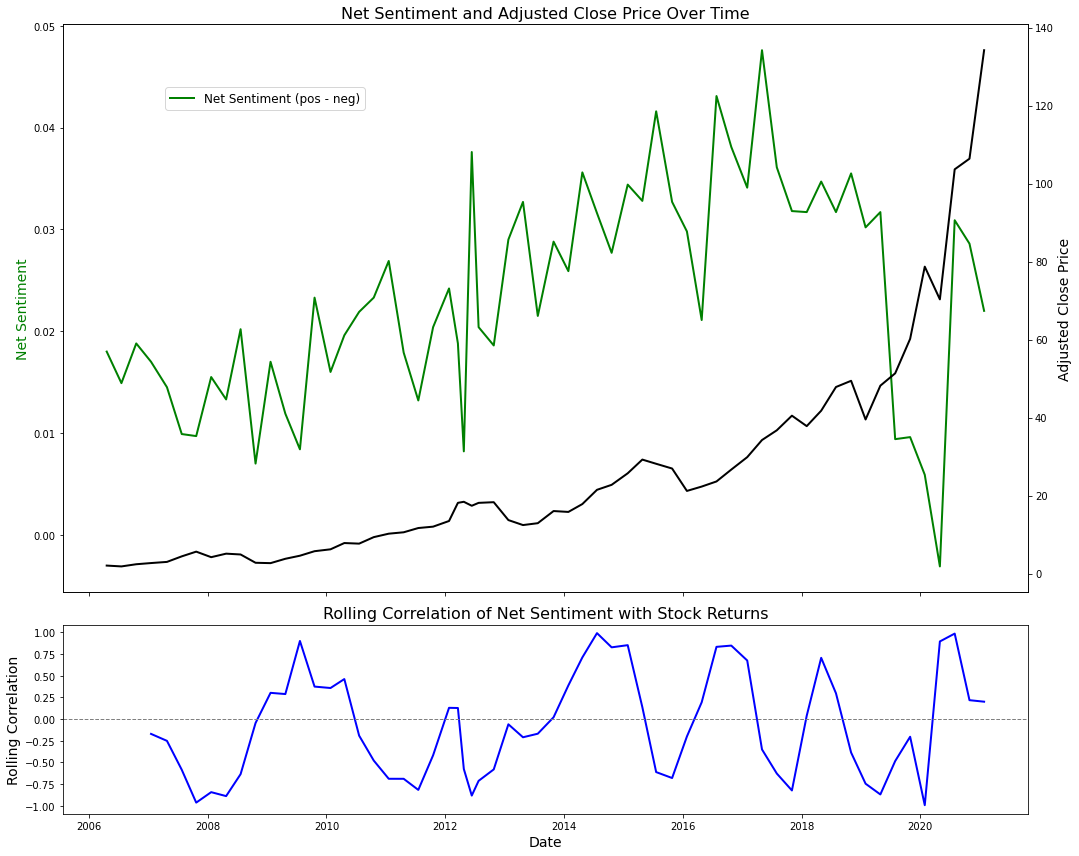

In [36]:
import matplotlib.pyplot as plt

# Step 1: Create the net sentiment score (pos - neg)
plot_data['net_sentiment'] = plot_data['pos'] - plot_data['neg']

# Step 2: Calculate rolling correlation between net_sentiment and returns
# Since we have quarterly data, we use a rolling window of 4 periods (4 quarters = 1 year)
window_size = 4  # 4 quarters (1 year) rolling window for quarterly data
rolling_corr_net_sent = plot_data['returns'].rolling(window_size).corr(plot_data['net_sentiment'])

# Step 3: Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# Plotting Net Sentiment and Adjusted Close Price in the first subplot
ax1.plot(plot_data.index, plot_data['net_sentiment'], color='green', label='Net Sentiment (pos - neg)', linewidth=2)
ax1.set_ylabel('Net Sentiment', color='green', fontsize=14)

# Creating a second y-axis on the first subplot for Adjusted Close Price
ax1_twin = ax1.twinx()
ax1_twin.plot(plot_data.index, plot_data['Adj Close'], color='black', label='Adjusted Close Price', linewidth=2)
ax1_twin.set_ylabel('Adjusted Close Price', color='black', fontsize=14)

# Title for the first subplot
ax1.set_title('Net Sentiment and Adjusted Close Price Over Time', fontsize=16)

# Adding a legend
ax1.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), fontsize=12)

# Step 4: Plot the rolling correlation in the second subplot
ax2.plot(plot_data.index, rolling_corr_net_sent, label='Rolling Correlation (Net Sentiment and Returns)', color='blue', linewidth=2)
ax2.set_xlabel('Date', fontsize=14)
ax2.set_ylabel('Rolling Correlation', fontsize=14)
ax2.set_title('Rolling Correlation of Net Sentiment with Stock Returns', fontsize=16)

# Add a horizontal line at 0 correlation for reference
ax2.axhline(0, color='grey', linewidth=1, linestyle='--')

# Adjust the layout to avoid overlap
plt.tight_layout()

plt.show()


In [37]:
plot_data[['net_sentiment', "returns"]].describe()

,net_sentiment,returns
count,62.000000,62.000000
mean,0.023568,0.117235
std,0.010538,1.942848
min,-0.003100,-6.312973
25%,0.016250,-0.371179
50%,0.022650,0.111287
75%,0.031700,0.744166
max,0.047600,9.823151


# Tip for scoring all your transcripts
# Why Loading All Pickle Files at Once is a Bad Idea

When working in environments with limited resources, such as Jupyter notebooks or small servers, loading all pickle files containing large amounts of JSON data at once can be inefficient and risky. Here's why:

## 1. Memory Overload
Loading all pickle files at once stores each file's data in memory. If the files are large (e.g., company transcripts), this quickly consumes available RAM. When the memory fills up:
- The system may start **swapping** (using disk space as virtual memory), which is much slower than RAM and drastically reduces performance.
- Eventually, the memory demand might exceed the available resources, leading to **server crashes**.

## 2. CPU Inefficiency
When you load all the data at once, the CPU has to deserialize and process everything before any actual computation (like sentiment scoring) starts. This puts unnecessary pressure on the CPU, leading to inefficiencies. A better approach is to process each file as you load it, which spreads the workload over time.

## 3. Scalability Issues
As the number of files or the size of the data increases, loading everything at once becomes unsustainable. Handling one file at a time ensures that the solution can scale to larger datasets.

## 4. Wasted Time and Resources
If your goal is to score transcripts one at a time, there is no need to load all files upfront. **Loading, processing, and discarding** files one by one saves both memory and computational resources, making the process more efficient.

---

# Bad Approach: Loading All Files at Once

```python
# Load all pickle files at once (Bad approach)
# Step 1: Load all data into a list
all_data = []

for filename in os.listdir(directory):
    if filename.endswith('.p'):
        with open(os.path.join(directory, filename), 'rb') as f:
            data = pickle.load(f)  # Load data into memory
            all_data.append(data)   # Store the entire data object in the list
# NOW WE HAVE A HUGE AMOUNT OF DATA (THE WHOLE COURSE MATERIAL) IN all_data... THIS WILL CRASH
            
            
# Step 2: Loop over the loaded data and process transcripts
sentiment_scores = pd.DataFrame(columns=['pos', 'neg', 'unc'])

for data in all_data:  # Loop over the loaded data
    for transcript in data['transcripts']:  # Process each transcript
        score = score_transcript(transcript)  # Perform scoring
        sentiment_scores = pd.concat([sentiment_scores, pd.DataFrame([score], columns=['pos', 'neg', 'unc'])]).reset_index(drop=True)

```
                    
Problems:
* Loads all pickle files into memory, consuming a lot of RAM. Too much RAM which causes a kernel crash
* Causes memory pressure and potentially server crashes if the dataset size exceeds available memory.
* Inefficient, as processing only begins after all files are loaded.

# Good Approach: Load, Process, and Move to the Next File
```python
# Load, process, and move to the next file (Good approach)
for filename in os.listdir(directory):
    if filename.endswith('.p'):
        with open(os.path.join(directory, filename), 'rb') as f:
            data = pickle.load(f)  # Load one file at a time
            for transcript in data['transcripts']:
                score = score_transcript(transcript)  # Perform some scoring
                sentiment_scores = pd.concat([sentiment_scores, pd.DataFrame([np.array(scores)], columns=['pos', 'neg', 'unc'])]).reset_index(drop=True)
```
Benefits:
* Memory-efficient: Only one file is loaded into memory at a time, reducing memory usage.
* Scalable: This approach can handle larger datasets without overwhelming the system.
* Faster overall process: Processing starts immediately as files are loaded, improving performance.

# Conclusion
By loading, processing, and discarding files one by one, you make your application far more efficient. This method avoids overloading the server’s memory and keeps your CPU usage in check, allowing for smooth and continuous processing without crashes. This approach is particularly well-suited for resource-limited environments like Jupyter notebooks, especially when dealing with large datasets such as company transcripts stored in pickle files.